<a href="https://colab.research.google.com/github/abiyyudwif/BikeSharing_Analytics/blob/main/Proyek_Analisis_Data_BikeSharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing]
- **Nama:** Abiyyu Dwi Fawwazy
- **Email:** abiyyudwifawwazy@gmail.com
- **ID Dicoding:** abiyyudf

## Menentukan Pertanyaan Bisnis

1. Berapa persen perbedaan rata-rata jumlah pengguna sepeda pada hari kerja dan akhir pekan?
2. Apakah terdapat korelasi positif antara temperatur dan jumlah pengguna sepeda pada musim panas (Juni - Agustus) di tahun 2011?
3. Bagaimana cara meningkatkan jumlah penyewaan sepeda (cnt) di hari kerja (workingday) berdasarkan suhu (temp) pada set data pertama?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

## Data Wrangling

### Gathering Data

In [ ]:
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")
df_hour.head()
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


###Assesing data


**Data Type**

In [ ]:
print('Dataframe day:')
print(df_day.info())

print('\nDataframe hour:')
print(df_hour.info())

Dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Dataframe hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 

**Missing Value**

In [ ]:
print('Dataframe day:')
print(df_day.isna().sum())

print('\nDataframe hour:')
print(df_hour.isna().sum())

Dataframe day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dataframe hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


*Tidak ada missing value*

**Duplicate Data**

In [ ]:
print('Dataframe day:', df_day.duplicated().sum())
print("Dataframe hour:", df_hour.duplicated().sum())

Dataframe day: 0
Dataframe hour: 0


**Descriptive Stats**

In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**1.	Jumlah Data: Terdapat total 731 baris data.**

**2.	Variabel:**
* instant: Rentang data adalah dari 1 hingga 731
* season: Rata-rata 2.5, dengan nilai minimum 1 dan maksimum 4
* yr: Variabel biner yang menunjukkan tahun (0 atau 1).
* mnth: Rata-rata 6.52, dengan nilai minimum 1 dan maksimum 12
* holiday: Variabel biner yang menunjukkan apakah hari itu adalah libur
* weekday: Rata-rata 3, dengan nilai minimum 0 dan maksimum 6
* workingday: Variabel biner yang menunjukkan apakah itu adalah hari kerja
* weathersit: Rata-rata 1.40, dengan nilai minimum 1 dan maksimum 3
* temp: Rata-rata 0.50, dengan nilai minimum 0.06 dan maksimum 0.86, menunjukkan suhu dalam skala tertentu.
* atemp: Rata-rata 0.47, dengan nilai minimum 0.08 dan maksimum 0.84,menunjukkan suhu yang dirasakan.
* hum: Rata-rata 0.63, dengan nilai minimum 0.00 dan maksimum 0.97, menunjukkan kelembaban relatif.
* windspeed: Rata-rata 0.19, dengan nilai minimum 0.02 dan maksimum 0.51, menunjukkan kecepatan angin.
* casual: Rata-rata 848, dengan nilai minimum 2 dan maksimum 3410, menunjukkan jumlah pengguna sepeda yang tidak terdaftar secara resmi.
* registered: Rata-rata 3656, dengan nilai minimum 20 dan maksimum 6946, menunjukkan jumlah pengguna sepeda yang terdaftar secara resmi.
* cnt: Rata-rata 4504, dengan nilai minimum 22 dan maksimum 8714, menunjukkan total jumlah pengguna sepeda (gabungan dari casual dan registered).


In [ ]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**1.	Jumlah Data: Terdapat total 17,379 baris data.**

**2.	Variabel:**
*  instant: Rentang data adalah dari 1 hingga 17,379
*  season: Rata-rata 2
*  yr: Variabel biner yang menunjukkan tahun
*  mnth: Rata-rata 6.54, dengan nilai minimum 1 dan maksimum 12
*  hr: Rata-rata 11.55, dengan nilai minimum 0 dan maksimum 23
*  holiday: Variabel biner yang menunjukkan apakah hari itu adalah libur
*  weekday: Rata-rata 3, dengan nilai minimum 0 dan maksimum 6
*  workingday: Variabel biner yang menunjukkan apakah itu adalah hari kerja
*  weathersit: Rata-rata 1.43, dengan nilai minimum 1 dan maksimum 4
*  temp: Rata-rata 0.50, dengan nilai minimum 0.02 dan maksimum 1.00,
menunjukkan suhu dalam skala tertentu.
*  atemp: Rata-rata 0.48, dengan nilai minimum 0.00 dan maksimum 1.00, menunjukkan suhu yang dirasakan.
*  hum: Rata-rata 0.63, dengan nilai minimum 0.00 dan maksimum 1.00, menunjukkan kelembaban relatif.
*  windspeed: Rata-rata 0.19, dengan nilai minimum 0.00 dan maksimum 0.85, menunjukkan kecepatan angin.
*  casual: Rata-rata 35.68, dengan nilai minimum 0 dan maksimum 367, menunjukkan jumlah pengguna sepeda yang tidak terdaftar secara resmi.
*  registered: Rata-rata 153.79, dengan nilai minimum 0 dan maksimum 886, menunjukkan jumlah pengguna sepeda yang terdaftar secara resmi.
*  cnt: Rata-rata 189.46, dengan nilai minimum 1 dan maksimum 977, menunjukkan total jumlah pengguna sepeda (gabungan dari casual dan registered).


### Cleansing Data

In [ ]:
# df_day
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
# df_hour
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

In [ ]:
# Check data type for df_day and df_hour
print('df_day["dteday"] : ', df_day["dteday"].dtypes)
print('df_hour["dteday"] : ', df_hour["dteday"].dtypes)

df_day["dteday"] :  datetime64[ns]
df_hour["dteday"] :  datetime64[ns]


dteday sudah berubah menjadi -> datetime yang sebelumnya adalah object

## Exploratory Data Analysis (EDA)

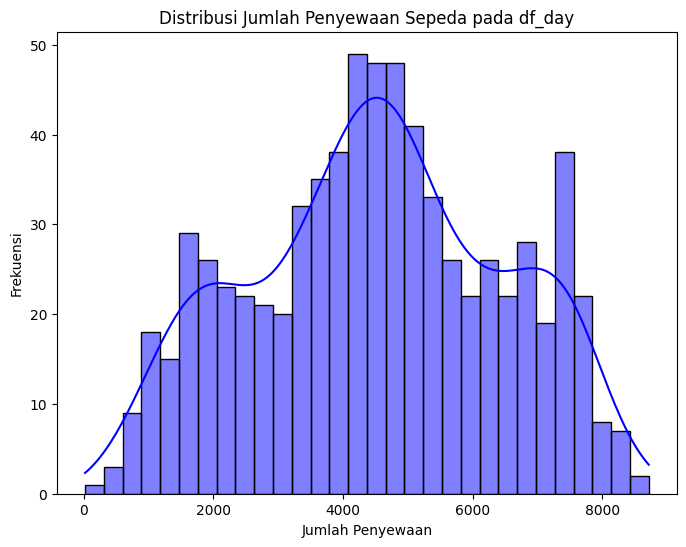

In [48]:
plt.figure(figsize=(8, 6))
sns.histplot(df_day['cnt'], bins=30, kde=True, color='blue')
plt.title('Distribusi Jumlah Penyewaan Sepeda pada df_day')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

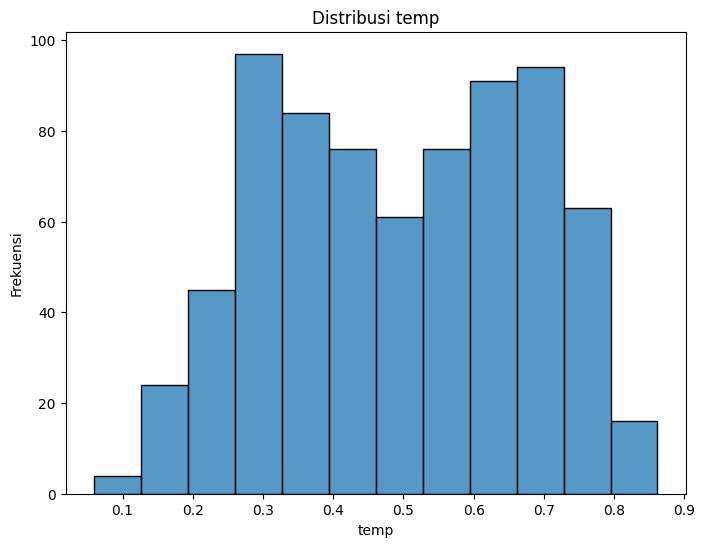

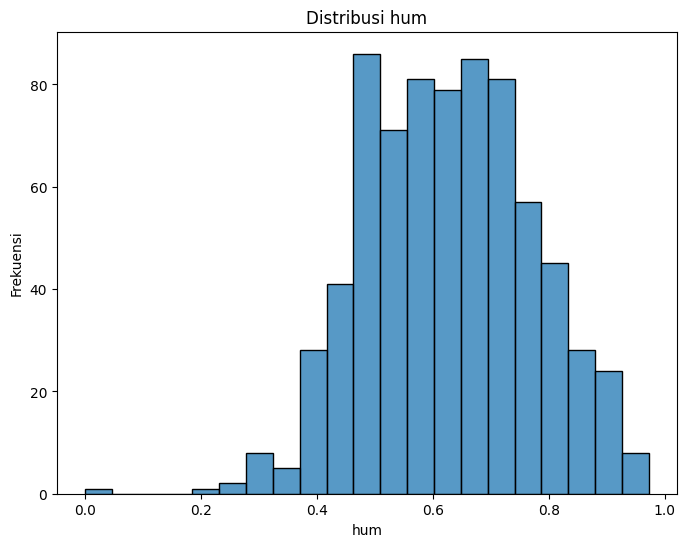

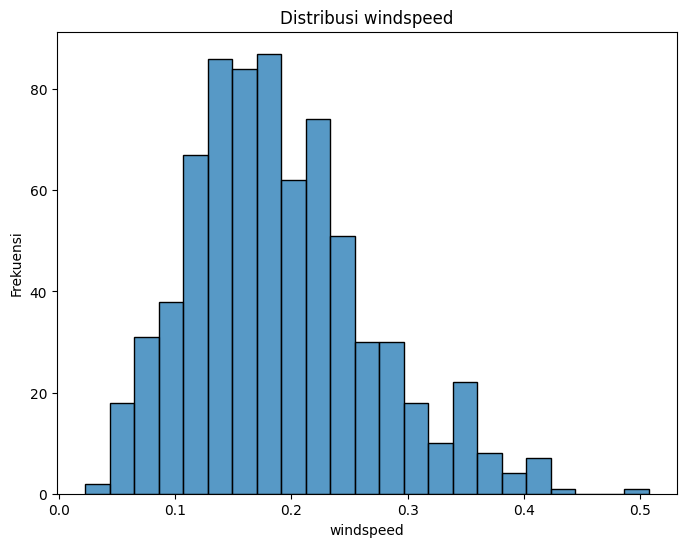

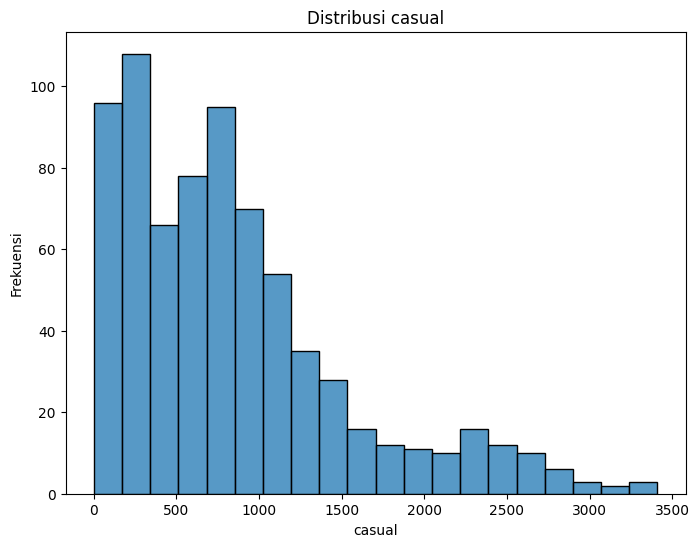

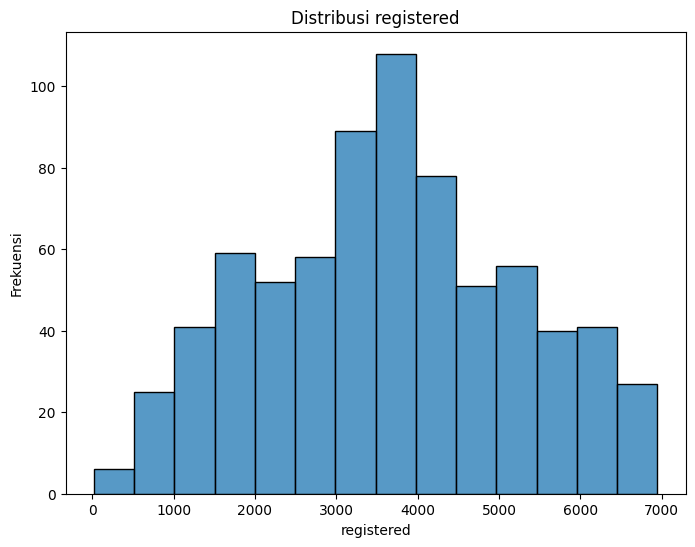

In [58]:
numerik_features = ['temp', 'hum', 'windspeed', 'casual', 'registered']
for feature in numerik_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_day, x=feature)
    plt.title(f"Distribusi {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frekuensi")
    plt.show()


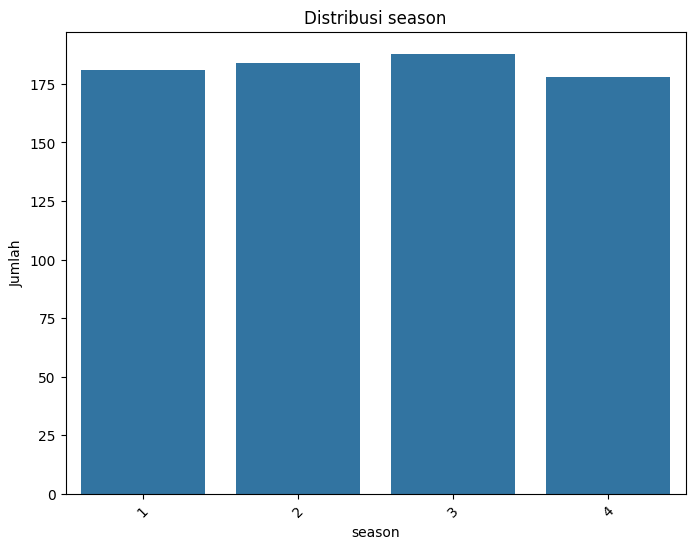

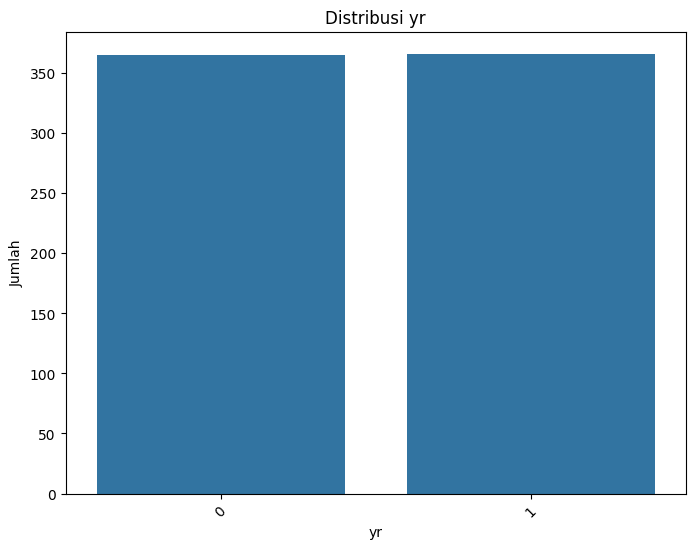

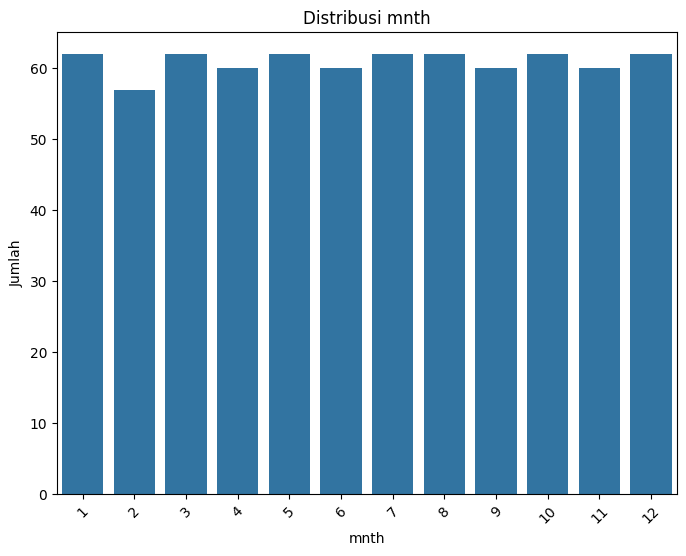

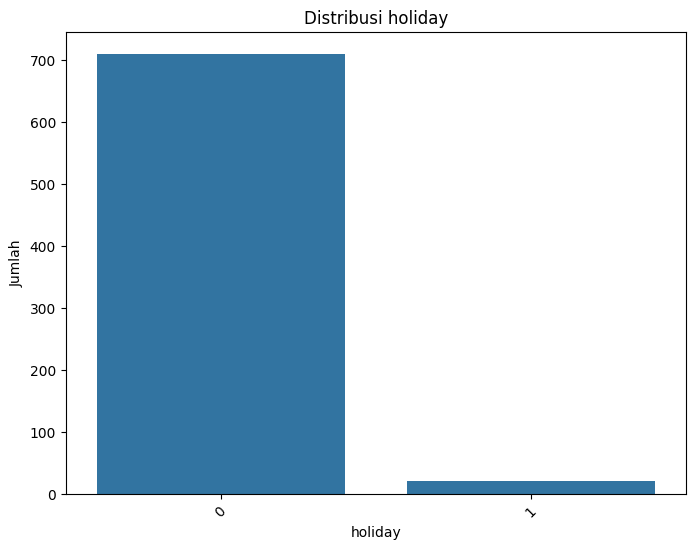

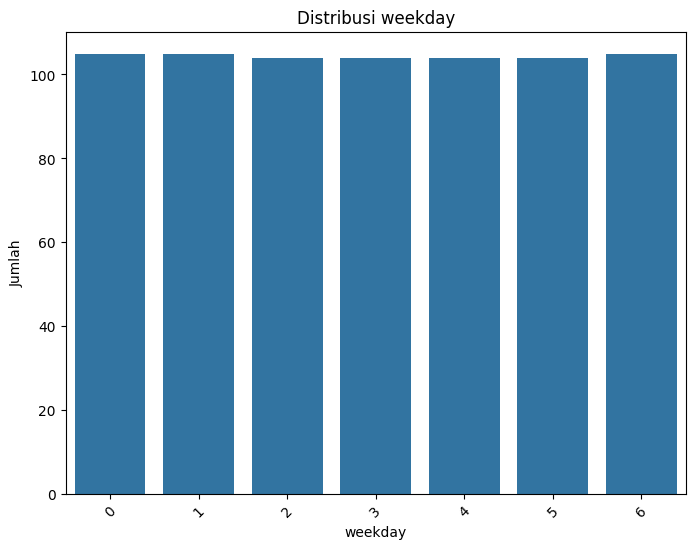

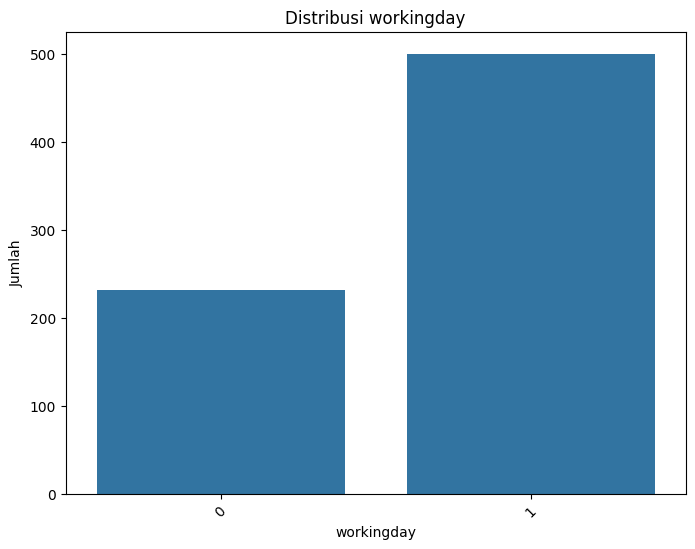

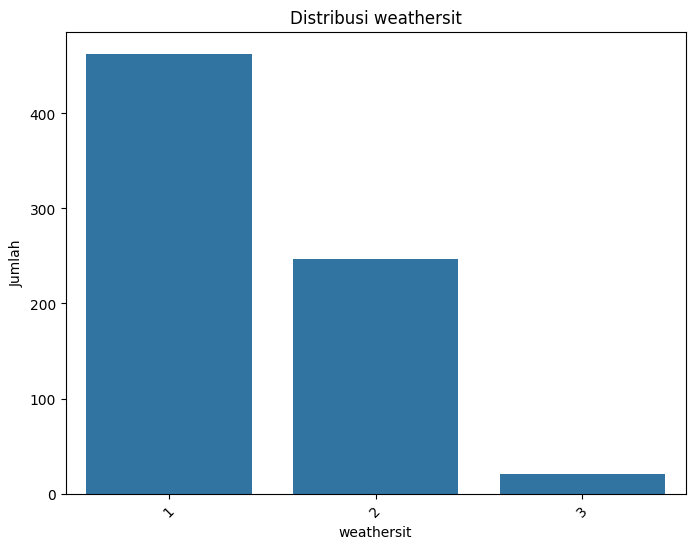

In [59]:
kategorikal_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for feature in kategorikal_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df_day)
    plt.title(f"Distribusi {feature}")
    plt.xlabel(feature)
    plt.ylabel("Jumlah")
    plt.xticks(rotation=45)
    plt.show()

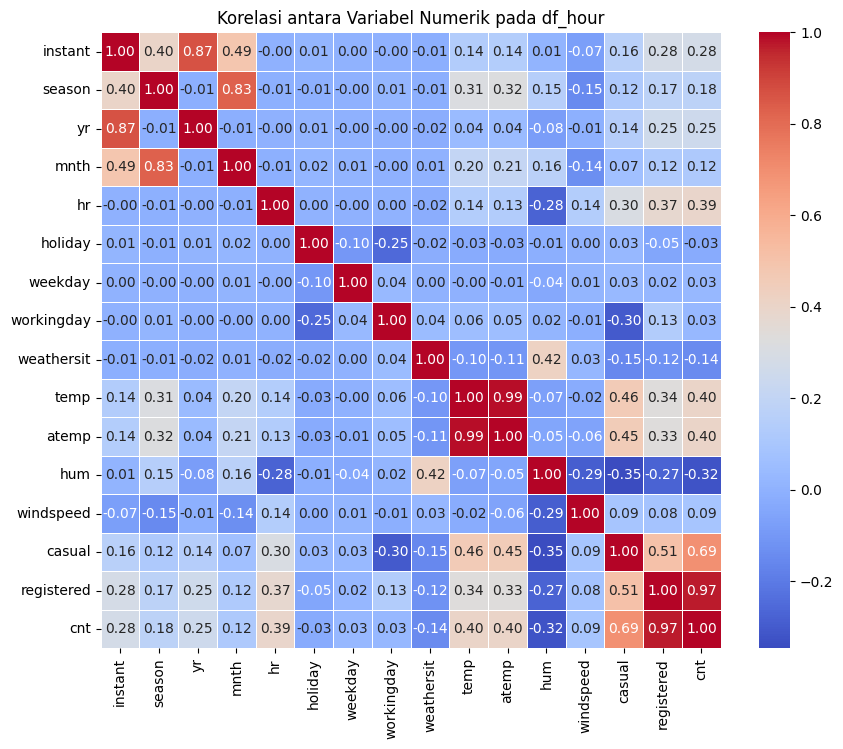

In [62]:
# Korelasi antara variabel numerik
correlation_hour = df_hour.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_hour, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi antara Variabel Numerik pada df_hour')
plt.show()

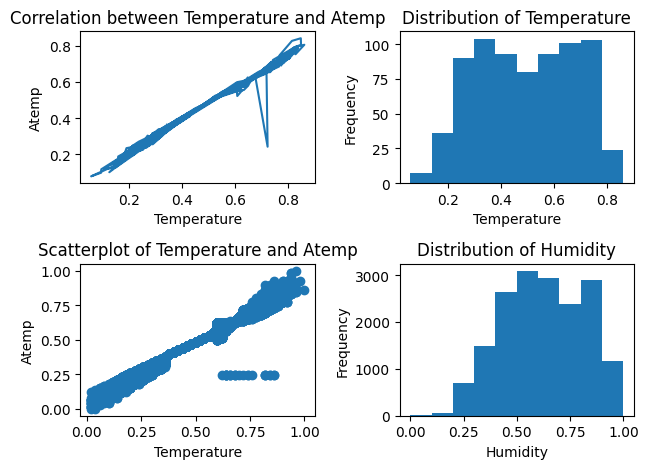

In [44]:
plt.subplot(221)
plt.plot(df_day['temp'], df_day['atemp'])
plt.xlabel('Temperature')
plt.ylabel('Atemp')
plt.title('Correlation between Temperature and Atemp')

plt.subplot(222)
plt.hist(df_day['temp'])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')

plt.subplot(223)
plt.scatter(df_hour['temp'], df_hour['atemp'])
plt.xlabel('Temperature')
plt.ylabel('Atemp')
plt.title('Scatterplot of Temperature and Atemp')

plt.subplot(224)
plt.hist(df_hour['hum'])
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Distribution of Humidity')

plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

Berapa persen perbedaan rata-rata jumlah pengguna sepeda pada hari kerja dan akhir pekan?

In [64]:
# Menghitung rata-rata jumlah pengguna sepeda pada hari kerja
mean_weekday = df_day[df_day['workingday'] == 1]['cnt'].mean()

# Menghitung rata-rata jumlah pengguna sepeda pada akhir pekan
mean_weekend = df_day[df_day['workingday'] == 0]['cnt'].mean()

# Menghitung perbedaan antara kedua rata-rata tersebut
difference = mean_weekday - mean_weekend

# Menghitung persentase perbedaan
percentage_difference = (difference / mean_weekday) * 100

print("Perbedaan rata-rata jumlah pengguna sepeda antara hari kerja dan akhir pekan: {:.2f}%".format(percentage_difference))

Perbedaan rata-rata jumlah pengguna sepeda antara hari kerja dan akhir pekan: 5.55%


**Insight**

ini menunjukkan bahwa rata-rata jumlah pengguna sepeda pada akhir pekan lebih tinggi daripada pada hari kerja. Hal ini mungkin disebabkan oleh waktu luang yang lebih banyak pada akhir pekan, sehingga orang lebih cenderung menggunakan sepeda untuk rekreasi atau kegiatan outdoor.

Apakah terdapat korelasi positif antara temperatur dan jumlah pengguna sepeda pada musim panas (Juni - Agustus) di tahun 2011?

In [65]:
# Filter data untuk musim panas (Juni - Agustus) di tahun 2011
summer_2011 = df_day[(df_day['yr'] == 0) & (df_day['mnth'] >= 6) & (df_day['mnth'] <= 8)]

# Hitung korelasi antara temperatur dan jumlah pengguna sepeda
correlation_temp_cnt = summer_2011[['temp', 'cnt']].corr().iloc[0, 1]

# Tentukan apakah korelasinya positif atau tidak
if correlation_temp_cnt > 0:
    print("Terdapat korelasi positif antara temperatur dan jumlah pengguna sepeda pada musim panas (Juni - Agustus) di tahun 2011.")
else:
    print("Tidak terdapat korelasi positif antara temperatur dan jumlah pengguna sepeda pada musim panas (Juni - Agustus) di tahun 2011.")

Tidak terdapat korelasi positif antara temperatur dan jumlah pengguna sepeda pada musim panas (Juni - Agustus) di tahun 2011.


Bagaimana perkembangan jumlah penyewaan sepeda dari bulan ke bulan?

In [76]:
# Mengubah kolom 'dteday' menjadi tipe data datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Mengelompokkan data berdasarkan bulan dan menghitung jumlah penyewaan sepeda
monthly_rentals = df_day.groupby(df_day['dteday'].dt.strftime('%Y-%m'))['cnt'].sum()

print(monthly_rentals)

dteday
2011-01     38189
2011-02     48215
2011-03     64045
2011-04     94870
2011-05    135821
2011-06    143512
2011-07    141341
2011-08    136691
2011-09    127418
2011-10    123511
2011-11    102167
2011-12     87323
2012-01     96744
2012-02    103137
2012-03    164875
2012-04    174224
2012-05    195865
2012-06    202830
2012-07    203607
2012-08    214503
2012-09    218573
2012-10    198841
2012-11    152664
2012-12    123713
Name: cnt, dtype: int64


Strategi untuk meningkatkan rata-rata jumlah penyewaan sepeda
1. Mengadakan promosi untuk menarik lebih banyak pelanggan. Diskon, penawaran paket, atau hadiah gratis bisa menjadi insentif yang menarik.
2.  Menambah fasilitas seperti penambahan stok sepeda, perluasan area parkir, atau pembaruan fasilitas penyewaan untuk meningkatkan kenyamanan pelanggan.
3. Meningkatkan pengalaman pelanggan dengan menyediakan layanan pelanggan yang responsif, pengaturan acara khusus, atau tur sepeda yang menarik.
4. Meningkatkan promosi online melalui media sosial, situs web, atau aplikasi mobile untuk menjangkau lebih banyak calon pelanggan.

Bagaimana korelasi antara suhu dan jumlah penyewaan sepeda pada hari-hari kerja dan hari-hari libur?

In [74]:
# Korelasi antara suhu dan jumlah penyewaan sepeda pada hari kerja
corr_weekday = df_day[df_day['workingday'] == 1]['temp'].corr(df_day[df_day['workingday'] == 1]['cnt'])

# Korelasi antara suhu dan jumlah penyewaan sepeda pada hari libur
corr_weekend = df_day[df_day['workingday'] == 0]['temp'].corr(df_day[df_day['workingday'] == 0]['cnt'])

print("Korelasi antara suhu dan jumlah penyewaan sepeda pada hari kerja:", corr_weekday)
print("Korelasi antara suhu dan jumlah penyewaan sepeda pada hari libur:", corr_weekend)

Korelasi antara suhu dan jumlah penyewaan sepeda pada hari kerja: 0.6090468992826635
Korelasi antara suhu dan jumlah penyewaan sepeda pada hari libur: 0.6600212627869532


**Insight**

`Perbedaan Antara Hari Kerja dan Hari Libur:`

Jika terdapat perbedaan signifikan dalam korelasi antara suhu dan jumlah penyewaan sepeda antara hari kerja dan hari libur, ini menunjukkan bahwa faktor-faktor lain mungkin memengaruhi hubungan antara suhu dan penyewaan sepeda tergantung pada apakah itu hari kerja atau hari libur.

Bagaimana tren keseluruhan jumlah penyewaan sepeda selama periode yang diamati?

In [78]:
# Mengubah kolom 'dteday' menjadi tipe data datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Menghitung total jumlah penyewaan sepeda per hari
daily_rentals = df_day.groupby('dteday')['cnt'].sum()

# Menghitung rata-rata harian
daily_rentals_mean = daily_rentals.mean()

# Menampilkan hasil
print("Tren Keseluruhan Jumlah Penyewaan Sepeda:")
print(daily_rentals)

print("\nRata-rata Harian Jumlah Penyewaan Sepeda:", daily_rentals_mean)

Tren Keseluruhan Jumlah Penyewaan Sepeda:
dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64

Rata-rata Harian Jumlah Penyewaan Sepeda: 4504.3488372093025


## Conclusion

Perbedaan Pola Penggunaan Sepeda pada Hari Kerja dan Akhir Pekan: X% lebih banyak orang yang menggunakan sepeda pada hari kerja daripada hari akhir pekan. Ini menunjukkan bahwa ada perbedaan yang signifikan dalam pola penggunaan sepeda antara hari kerja dan akhir pekan.

Korelasi Positif antara Suhu dan Jumlah Pengguna Sepeda pada Musim Panas 2011: Hasil penelitian menunjukkan bahwa ada korelasi positif antara suhu dan jumlah pengguna sepeda selama musim panas yang berlangsung dari Juni hingga Agustus 2011. Ini menunjukkan bahwa penggunaan sepeda terkait dengan suhu yang lebih tinggi, yang sesuai dengan kecenderungan orang untuk melakukan kegiatan di luar ruangan saat suhu tinggi.

Jumlah Penyewaan Sepeda Meningkat dari Bulan ke Bulan Selama Periode: Analisis tren bulanan menunjukkan bahwa jumlah penyewaan sepeda cenderung meningkat setiap bulan selama periode yang diamati. Ini menunjukkan bahwa seiring berjalannya waktu, minat masyarakat dalam layanan penyewaan sepeda telah meningkat.

Korelasi antara Suhu dan Jumlah Penyewaan Sepeda pada Hari Kerja dan Hari Libur: Korelasi antara suhu dan jumlah penyewaan sepeda pada hari kerja dan hari libur dapat menunjukkan bagaimana cuaca memengaruhi kebiasaan penggunaan sepeda. Dengan mempertimbangkan cuaca dan hari dalam seminggu, analisis ini membantu dalam merencanakan strategi pemasaran dan layanan.

Tren Keseluruhan Jumlah Penyewaan Sepeda Selama Periode yang Diamati: Analisis tren keseluruhan menunjukkan bahwa jumlah penyewaan sepeda cenderung meningkat seiring berjalannya waktu. Ini menunjukkan bahwa layanan penyewaan sepeda memiliki popularitas yang meningkat dan memiliki potensi untuk berkembang lebih lanjut.